In [7]:
from tifffile import imread
import os, glob
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import logging
import warnings
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('test')

path_adata = '/date/sl/embryoscope/folder_shared/Xenium_anndata/'

01:40:30 INFO:test


/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


EV37_TL
30.0
EV37_con
18.0
EV39_TL
22.0
EV39_con
61.0
71.0


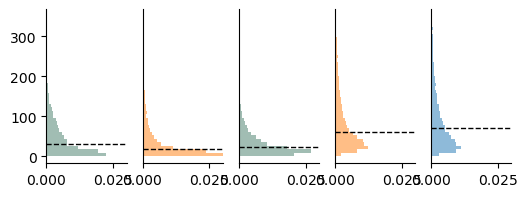

In [8]:
## Unfiltered transcript count
adata_GBM_raw = sc.read_h5ad(path_adata + 'GBM_unfiltered.h5ad')

sample_IDs = ['EV38_TL_B']  ## EV38_TL_A has a fold, EV36_TL has low per cell counts (13 mean)
dirs = glob.glob(outdir + '/*')
valid_samples = [[x for x in dirs if s in x] for s in sample_IDs]
valid_samples = [x for s in valid_samples for x in s]

all_data = [sc.read(f) for f in valid_samples]
adata_cortex_raw=sc.concat(all_data)

tissues = ['EV37_TL', 'EV37_con', 'EV39_TL','EV39_con']

cmap = {'EV37_TL': '#447c69', 
        'EV37_con': '#ff7f0e', 
        'EV39_TL': '#447c69',
        'EV39_con': '#ff7f0e'}

fig, ax = plt.subplots(1,5, figsize = (6,2))
for i, t in enumerate(tissues):
    print(t)
    adatasub=adata_GBM_raw[[t in x for x in adata_GBM_raw.obs['replicate']]]
    ax[i].hist(adatasub.obs['transcript_counts'], bins=40, range=(0,350), orientation='horizontal', alpha=.5, density=True, color=cmap[t])
    ax[i].set_xlim([0, .03])
    if i > 0:
        ax[i].get_yaxis().set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].axhline(np.median(adatasub.obs['transcript_counts']), c='black', ls='--', lw=1)
    print(np.median(adatasub.obs['transcript_counts']))

ax[4].hist(adata_cortex_raw.obs['transcript_counts'], bins=40, range=(0,350), orientation='horizontal', alpha=.5, density=True, color='#1f77b4')
ax[4].set_xlim([0, .03])
ax[4].get_yaxis().set_visible(False)
ax[4].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].axhline(np.median(adata_cortex_raw.obs['transcript_counts']), c='black', ls='--', lw=1)
print(np.median(adata_cortex_raw.obs['transcript_counts']))

/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


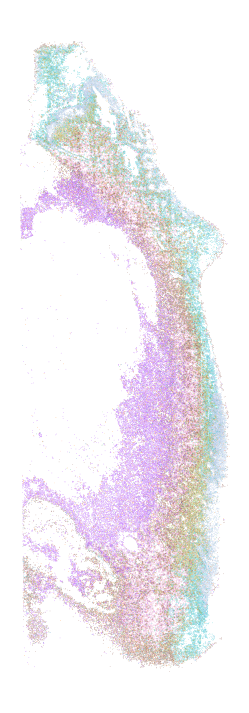

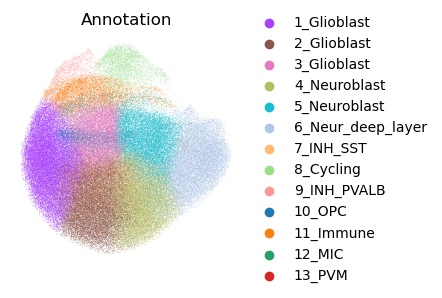

In [9]:
## Plot cortex sample
key = 'Annotation'

adata_cortex = sc.read_h5ad(path_adata + 'Cortex.h5ad')

cmap = {'10_OPC': '#1f77b4',
 '11_Immune': '#ff7f0e',
 '12_MIC': '#279e68',
 '13_PVM': '#d62728',
 '1_Glioblast': '#aa40fc',
 '2_Glioblast': '#8c564b',
 '3_Glioblast': '#e377c2',
 '4_Neuroblast': '#b5bd61',
 '5_Neuroblast': '#17becf',
 '6_Neur_deep_layer': '#aec7e8',
 '7_INH_SST': '#ffbb78',
 '8_Cycling': '#98df8a',
 '9_INH_PVALB': '#ff9896'}

s = 50 / np.sqrt(adata_cortex.shape[0])

plt.figure(figsize=(3,9))
plt.scatter(adata_cortex.obs['X'], adata_cortex.obs['Y'], c=[cmap[x] for x in adata_cortex.obs[key]], lw=0, s=s);
plt.gca().set_aspect('equal');
plt.gca().axis('off');

fig, ax = plt.subplots(1,1,figsize=(3,3))
ax = sc.pl.umap(adata_cortex,color=key,s=0.5, show=False, ax=ax, palette=cmap);
ax.axis('off');

/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be igno

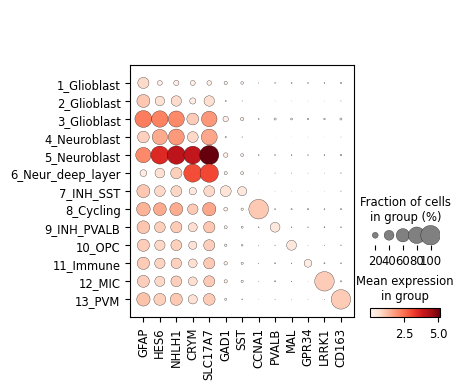

In [10]:
markers = ['GFAP', ## Glioblast
           'HES6', ## NPC
          'NHLH1', ## Neuroblast
          'CRYM',  ## Deep layer
          'SLC17A7', ## EXC
          'GAD1', 'SST', ## GABA
          'CCNA1', ## Prolif
          'PVALB', ## GABA
          'MAL', ## OPC
          'GPR34', 'LRRK1', 'CD163', ## Immune
          ]
fig, ax = plt.subplots(1,1,figsize=(4,4))
sc.pl.dotplot(adata_cortex, markers, groupby='Annotation', show=True, ax=ax);

/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


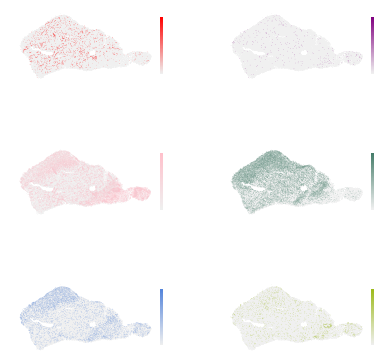

In [12]:
## Plot markers
from matplotlib.colors import LinearSegmentedColormap

adata = sc.read_h5ad(path_adata + 'GBM_annotated.h5ad')

s=.1
markers = ['CLDN5','CDK1','TIMP1', 
           'AQP4', 'CDK4', 'PDGFRA']
cmaps = ['Red', 'Purple', 'pink', 
         '#447c69', '#5384db', '#9cba19']
adatasub = adata[adata.obs['replicate']=='EV39_con']
X,Y = adatasub.obs['X'], adatasub.obs['Y']

fig, ax = plt.subplots(3,2, figsize=(5,5))
ax = ax.flatten()
for i, m in enumerate(markers):
    vals = adatasub[:,m].X.flatten()
    x = vals > np.min(vals)
    
    cmap = LinearSegmentedColormap.from_list("Custom", ['#efefef', cmaps[i]], N=100)
    # scat = ax[i].scatter(X[~x],Y[~x], s=s, lw=0, c='lightgrey')
    scat = ax[i].scatter(X[~x],Y[~x], s=s, lw=0, c='#f0f0f0')
    scat = ax[i].scatter(X[x],Y[x], s=s, lw=0, c=vals[x], cmap=cmap, vmin = np.min(vals))
    ax[i].axis('off')
    ax[i].set_aspect('equal')
    ax[i].set_xlim([0, np.max(X)])
    cb = fig.colorbar(scat, ax=ax[i], shrink=.5, orientation="vertical")
    cb.outline.set_visible(False)
    cb.set_ticks([])
plt.subplots_adjust(wspace=None, hspace=None)

## GBMap

<Axes: xlabel='louvain_1_0', ylabel='annotation_level_3'>

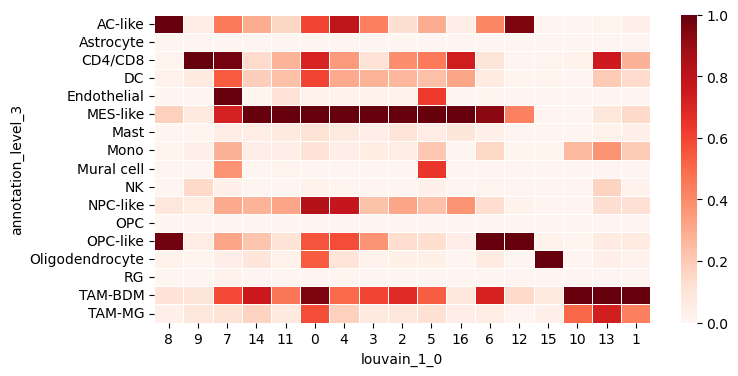

In [15]:
adata_ref = sc.read_h5ad(path_adata + 'GBMap_refdata.h5ad')

fig, ax = plt.subplots(1,1,figsize=(8,4))
df = pd.crosstab(adata.obs.annotation_level_3, adata.obs.louvain_1_0)
X = np.array(df)
X = X / np.max(X,0)[np.newaxis,:]

order = np.argmax(X,0)
order = np.argsort(order)
df = pd.DataFrame(X[:,order], columns = df.columns[order], index=df.index)
sns.heatmap(df, ax=ax, cmap='Reds', linewidths=0.5)

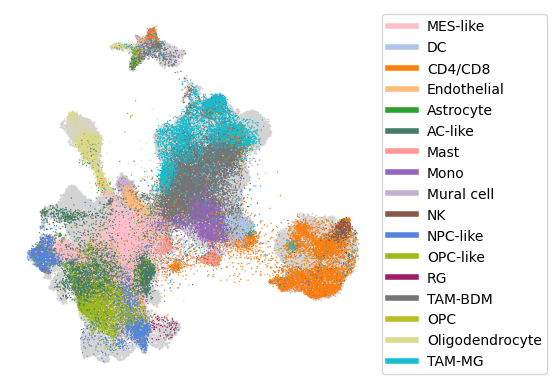

In [16]:
## Plot on GBMap background
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

key = 'annotation_level_3'

colors = {'MES-like': 'pink',
 'DC': (0.6823529411764706,0.7803921568627451,0.9098039215686274,1.0),
 'CD4/CD8': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'Endothelial': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'Astrocyte': (0.17254901960784313,0.6274509803921569,0.17254901960784313,1.0),
 'AC-like': '#447c69',
 'Mast': (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 'Mono': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'Mural cell': (0.7725490196078432,0.6901960784313725,0.8352941176470589,1.0),
 'NK': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 'NPC-like': '#5384db',
 'OPC-like': '#9cba19',
 # 'RG': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 'RG': '#9e1f63',
 'TAM-BDM': (0.4580392156862745, 0.4580392156862745, 0.4580392156862745, 1.0),
 'OPC': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 'Oligodendrocyte': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0),
 'TAM-MG': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)}

fig, ax = plt.subplots(1,1)
ax.scatter(adata_ref.obsm['X_umap'][::5,0], adata_ref.obsm['X_umap'][::5,1], 
           c='lightgrey', lw=0, s=2);
ax.scatter(adata.obsm['X_umap'][:,0], adata.obsm['X_umap'][:,1], 
           c=[colors[k] for k in adata.obs[key]], lw=0, s=1);

hidden_lines = [Line2D([0], [0], color=colors[k], lw=4) for k in colors]
ax.legend(hidden_lines, colors.keys(), loc='center left', bbox_to_anchor=(1, 0.5));
ax.axis('off');
ax.set_aspect('equal')

## Plot sections with colors from GBmap

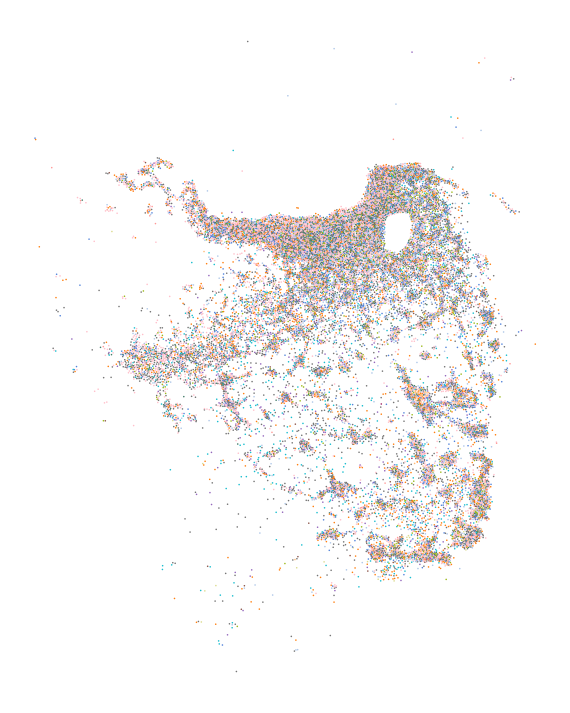

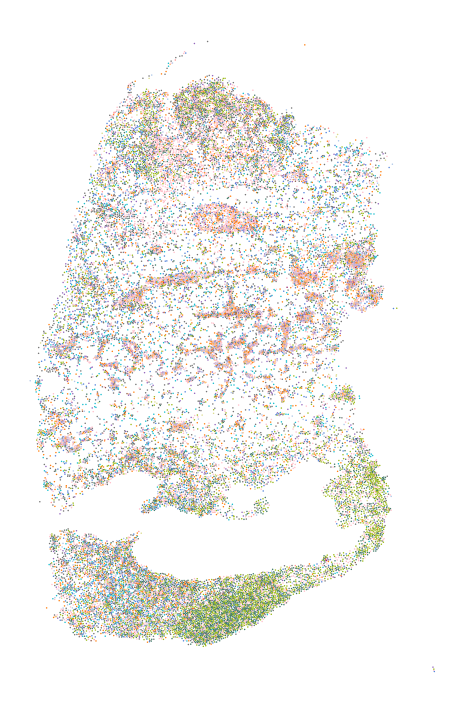

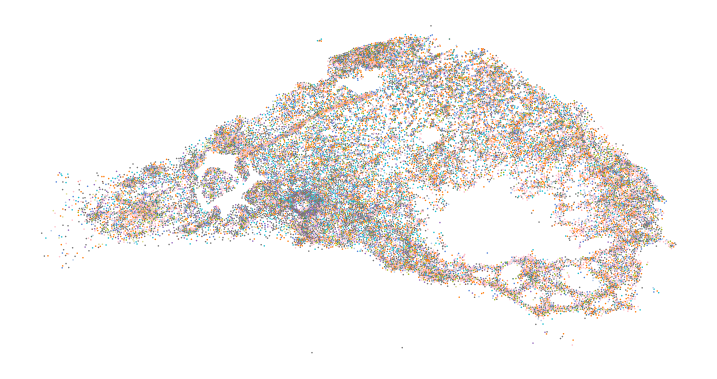

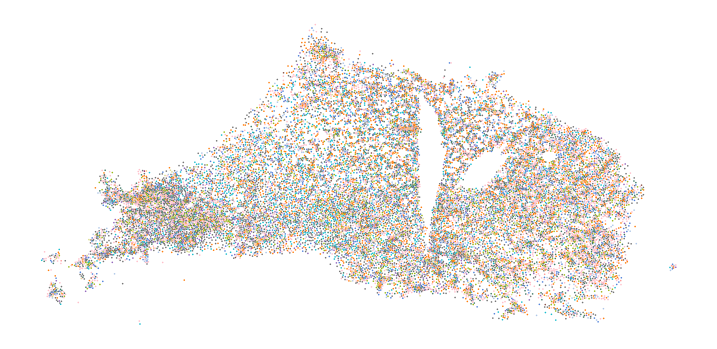

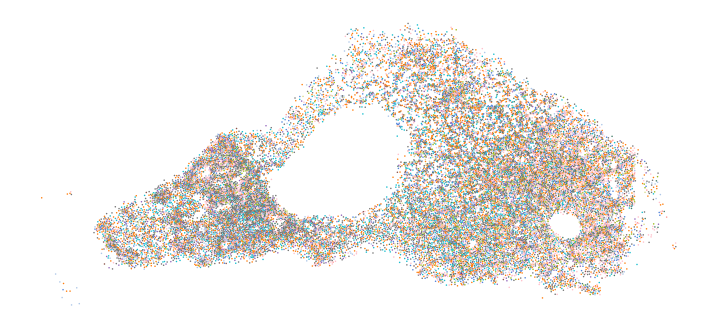

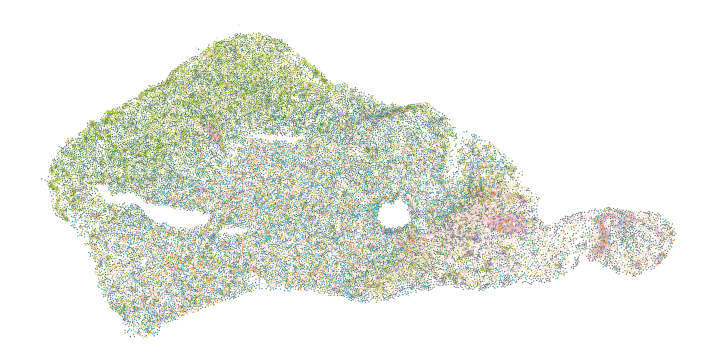

In [17]:
key = 'annotation_level_3'

for rep in np.unique(adata.obs['replicate']):
    tissue=adata[adata.obs['replicate']==rep]

    s = 200 / np.sqrt(tissue.shape[0])
    
    fig, ax = plt.subplots(1,1, figsize=(9,9))
    X,Y = tissue.obs['X'], tissue.obs['Y']
    ax.scatter(X,Y, s=s, c=[colors[x] for x in tissue.obs[key]], lw=0)
    ax.set_aspect('equal')
    ax.axis('off')

## Stacked bar plots

/home/camiel/anaconda3/envs/embryoscope2/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Text(0, 0.5, 'Fraction of cells')

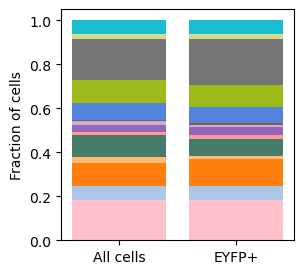

In [38]:
## Bar plots
from collections import Counter

key = 'annotation_level_3'
cmap = {'MES-like': 'pink',
 'DC': (0.6823529411764706,0.7803921568627451,0.9098039215686274,1.0),
 'CD4/CD8': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'Endothelial': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'Astrocyte': (0.17254901960784313,0.6274509803921569,0.17254901960784313,1.0),
 'AC-like': '#447c69',
 'Mast': (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 'Mono': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'Mural cell': (0.7725490196078432,0.6901960784313725,0.8352941176470589,1.0),
 'NK': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 'NPC-like': '#5384db',
 'OPC-like': '#9cba19',
 'RG': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 'TAM-BDM': (0.4580392156862745, 0.4580392156862745, 0.4580392156862745, 1.0),
 'OPC': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 'Oligodendrocyte': (0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0),
 'TAM-MG': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)}

adata = sc.read_h5ad(path_adata + 'GBM_annotated.h5ad')
x = np.where(adata.var_names == 'EYFP')[0][0]
EYFP = adata[np.where(np.array(adata.layers['raw'][:,x].todense()).flatten()>0)[0],:].copy()

plt.figure(figsize=(3,3))
bottoms = np.array([0,0]).astype('float')

totals = np.array([adata.shape[0], EYFP.shape[0]])
for k in cmap:
    vals = np.array([np.sum(np.array(adata.obs[key]==k)),
                    np.sum(np.array(EYFP.obs[key]==k))]) / totals
    
    plt.bar(np.array([0,1]), height=vals, bottom=bottoms, color=cmap[k])
    bottoms += vals
plt.xticks([0,1], ['All cells', 'EYFP+'])
plt.ylabel('Fraction of cells')

Text(0.5, 0, 'Fraction of cells')

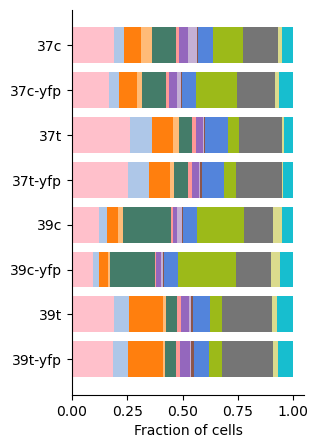

In [39]:
## Plot a distribution bar graph
EYFP = np.array(adata.layers['raw'][:,x].todense()).flatten() > 0

EV37_con = adata.obs.replicate == 'EV37_con'
EV37_con_Y = EV37_con & EYFP 
EV37_TL = adata.obs.replicate == 'EV37_TL'
EV37_TL_Y = EV37_TL & EYFP
EV39_con = adata.obs.replicate == 'EV39_con'
EV39_con_Y = EV39_con & EYFP
EV39_TL = np.array([x in ['EV39_TL_A', 'EV39_TL_B', 'EV39_TL_C'] for x in adata.obs.replicate])
EV39_TL_Y = EV39_TL & EYFP

plt.figure(figsize=(3,5))
bottoms = np.zeros(8).astype('float')

totals = np.array([np.sum(EV39_TL_Y), np.sum(EV39_TL), np.sum(EV39_con_Y), np.sum(EV39_con), np.sum(EV37_TL_Y), np.sum(EV37_TL), np.sum(EV37_con_Y), np.sum(EV37_con)])

for k in cmap:
    vals = np.array([np.sum(np.array(adata.obs[key]==k)[EV39_TL_Y]),
                     np.sum(np.array(adata.obs[key]==k)[EV39_TL]),
                     np.sum(np.array(adata.obs[key]==k)[EV39_con_Y]),
                     np.sum(np.array(adata.obs[key]==k)[EV39_con]),
                     np.sum(np.array(adata.obs[key]==k)[EV37_TL_Y]),
                     np.sum(np.array(adata.obs[key]==k)[EV37_TL]),
                     np.sum(np.array(adata.obs[key]==k)[EV37_con_Y]),
                     np.sum(np.array(adata.obs[key]==k)[EV37_con])])/ totals
     
    plt.barh(np.arange(8), width=vals, left=bottoms, color=cmap[k])
    bottoms += vals

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks(np.arange(8),['39t-yfp', '39t', '39c-yfp', '39c', '37t-yfp', '37t', '37c-yfp', '37c'])
plt.xlabel('Fraction of cells')